# **Lab 2 - Explainable and Trustworthy AI**


---



**Eleonora Poeta** (eleonora.poeta@polito.it)

**Lab 2:** Global post-hoc explainable models on structured data

# **Permutation Feature Importance**


---



*	Permutation feature importance is a model inspection technique that measures the **contribution** of **each feature** to the **model's performances** on a  given tabular dataset.
* A **feature** is **important** if shuffling its values, the ***model error increases***. So, the model relied on that feature for the prediction.


Key **advantages** of Permutation Feature importance technique:


> * Nice and **direct interpretation** of the model's behaviour.
* It is **model-agnostic**.
* It does **not require retraining the model**.



Main **disadvantages** of Permutation Feature importance technique:


> * It assumes the **Feature independence**. If features are correlated, it can be biased by unrealistic data instances.
* It is strictly linked to the **model performance measures**. In some cases other measures can be of interest.




---


## **Exercise 1**

The [**Titanic**](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active) dataset describes the survival status of individual passengers on the Titanic. In this exercise you have to:

* **Preprocess** the Titanic dataset. You can follow these main steps:
> * **Load** the dataset
  * **Split** the dataset into training and test set using the **80/20** ratio. **Shuffle** the dataset and **stratify** it using the target variable.
  * Fill **null** values. `age` column with the mean, `fare` with the median and `embarked` with the most frequent values.
  * Encoding
    * **Remove** columns that are *not informative for the final task*, or that *contain information about target variable*.
    * Perform **OneHotEncoding** and **OrdinalEncoder**, where needed.
    * Perform **MinMax** scaling, where needed,
    * We suggest to use the **[ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)** module

* Fit a **[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)()** over the Titanic dataset. We suggest to use the **[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)** module
* Inspect model's **accuracy** on training and test dataset.

### **Exercise 1.1**
* Calculate **Feature Importances** (as previously done in Lab 1):
> * What can you infer? What is the most important feature? Is it categorical or numerical?
> Note that you can aggregate (via sum) the feature importance for the feature value importance of the same categorical attribute to have the importance of the attribute

### **Exercise 1.2**
* Now, compute [**permutation_importance**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html).
>   * **Firstly**, compute this for the **test set**. What are the most important features?
    * Re-do the computation of permutation_importance, now **on the training set**. Did you obtain the same result as for the test set? If not, what can be the problem?

### **Exercise 1.3**
* Let's now instanciate another **RandomForestClassifier** with parameter `min_samples_leaf=20`.
> * Repeat the steps for computing the permutation_importance on both training and test set.
  * Has something changed? What can you infer about RandomForestClassifier's behaviour with respect to overfitting?


***Hint***:

> In the first case, the results of permutation_importance on the training and test set can be explained by overfitting of the RandomForestClassifier. So, the RF has capacity to use the feature `fare` to overfit.












## Data preprocessing - Titanic dataset

#### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import the required libraries for this exercise

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import tree

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load input features and target variable
df, y = fetch_openml("titanic", version=1, as_frame=True, parser='auto', return_X_y=True)

# The "survived" column contains the target variable
df["survived"] = y

In [4]:
# Split the dataset. 80% for training data and 20% for test data. Shuffle the dataset and perform stratification by label

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['survived'])

Fill null values in `age` column with the *mean* of the column in training and test set.

In [5]:
print(f'Number of null values in Train before pre-processing: {df_train.age.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test before pre-processing: {df_test.age.isnull().sum()}/{len(df_test)}')


df_train['age'] = df_train['age'].fillna(df_train['age'].mean())
df_test['age'] = df_test['age'].fillna(df_train['age'].mean())

print(f'Number of null values in Train after pre-processing: {df_train.age.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test after pre-processing: {df_test.age.isnull().sum()}/{len(df_test)}')

Number of null values in Train before pre-processing: 209/1047
Number of null values in Test before pre-processing: 54/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


Fill null values in `fare` column with the *median* of the column in training and test set.

In [6]:
print(f'Number of null values in Train before pre-processing: {df_train.fare.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test before pre-processing: {df_test.fare.isnull().sum()}/{len(df_test)}')


df_train['fare'] = df_train['fare'].fillna(df_train['fare'].median())
df_test['fare'] = df_test['fare'].fillna(df_train['fare'].median())


print(f'Number of null values in Train after pre-processing: {df_train.fare.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test after pre-processing: {df_test.fare.isnull().sum()}/{len(df_test)}')

Number of null values in Train before pre-processing: 1/1047
Number of null values in Test before pre-processing: 0/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


Fill null values in `embarked` column with the *most frequent value* of the column in training and test set.

In [7]:
print(f'Number of null values in Train before pre-processing: {df_train.embarked.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test before pre-processing: {df_test.embarked.isnull().sum()}/{len(df_test)}')


imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_train[['embarked']] = imp.fit_transform(df_train[['embarked']])

df_test[['embarked']] = imp.transform(df_test[['embarked']])


print(f'Number of null values in Train after pre-processing: {df_train.embarked.isnull().sum()}/{len(df_train)}')
print(f'Number of null values in Test after pre-processing: {df_test.embarked.isnull().sum()}/{len(df_test)}')

Number of null values in Train before pre-processing: 0/1047
Number of null values in Test before pre-processing: 2/262
Number of null values in Train after pre-processing: 0/1047
Number of null values in Test after pre-processing: 0/262


Remove columns that are not informative to the final task (predict who survived)

In [8]:
df_train = df_train.drop(columns=['name','ticket'])
df_test = df_test.drop(columns=['name','ticket'])

df_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest,survived
999,3,female,29.604316,0,0,7.7500,NaN,Q,15 16,NaN,NaN,1
392,2,female,24.000000,1,0,27.7208,NaN,C,12,NaN,"Lucca, Italy / California",1
628,3,female,11.000000,4,2,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN",0
1165,3,male,25.000000,0,0,7.2250,NaN,C,NaN,NaN,NaN,0
604,3,female,16.000000,0,0,7.6500,NaN,S,16,NaN,"Norway Los Angeles, CA",1


Remove columns `cabin`, `body`, `boat`, and `home.dest` from the train and test sets because they contain info about the target variable.

In [9]:
df_train = df_train.drop(columns=['cabin', 'body', 'boat', 'home.dest'])

df_test = df_test.drop(columns=['cabin', 'body', 'boat', 'home.dest'])

Extract target variable and input features for the train and test sets

In [10]:

# Extract target variable and input features for the training data
y_train = df_train['survived']               # Target variable trainig set
X_train = df_train.drop('survived', axis=1)  # Features training set


# Extract target variable and input features for  the testing data
y_test = df_test['survived']                 # Target variable test set
X_test = df_test.drop('survived', axis=1)    # Features test set

Define the preprocessing transformation for the input features. 
We will use the ColumnTransformer to apply different transformations to different columns of the input features.

We encode the categorical variables using one-hot encoding. 

We apply the min-max scaler to the numerical features. Note that we use to keep the age columns as it is, without discretizing it.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler


categorical_columns = ["pclass", "sex", "embarked"]
numerical_columns = ["sibsp", "parch", "fare", "age"]


categorical_encoder = OneHotEncoder(handle_unknown='ignore', drop='if_binary')


minmax_s = MinMaxScaler()

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", minmax_s, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

## **Solution**

#### Imports

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#### Fit the Random Forest Classifier

In [13]:
clf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num', MinMaxScaler(),
                                                  ['sibsp', 'parch', 'fare',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


#### Model's performances

Prior to inspecting the feature importances, it is important to check that the model predictive performance is high enough. Indeed there would be little interest of inspecting the important features of a non-predictive model.

In [15]:
print(f"RF train accuracy: {clf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {clf.score(X_test, y_test):.3f}")

RF train accuracy: 0.969
RF test accuracy: 0.779


### Exercise 1.a

#### Calculate the Feature Importances

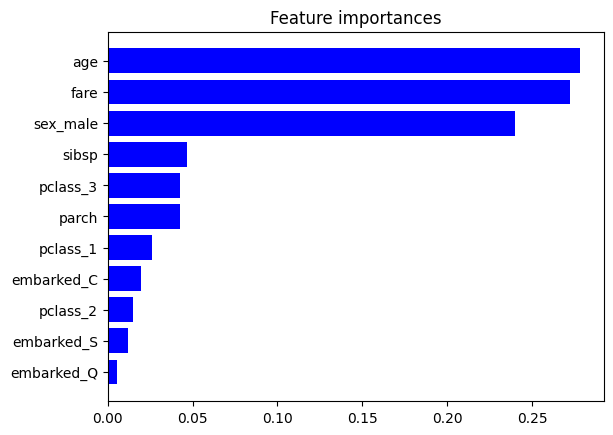

In [16]:
#Plot the feature importance

importance = clf[-1].feature_importances_

feature_names = clf[:-1].get_feature_names_out()


# Sort the feature importance
sorted_idx = importance.argsort()


#Plot the feature importance
plt.barh(feature_names[sorted_idx], importance[sorted_idx], color='blue')
plt.title("Feature importances")
plt.show()

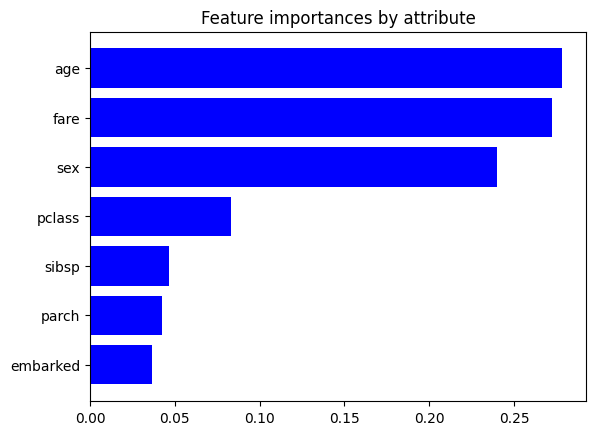

In [17]:
#Plot the feature importance aggregated by the categorical variables

importance = clf[-1].feature_importances_

feature_names = clf[:-1].get_feature_names_out()


# Aggregate the feature importance by the categorical variables
feature_importances = {}
for feature_name, importance in zip(feature_names, importance):
    feature_name = feature_name.split("_")[0] if "_" in feature_name else feature_name
    if feature_name in feature_importances:
        feature_importances[feature_name] += importance
    else:
        feature_importances[feature_name] = importance

# Sort the feature importance
feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=False))

#Plot the feature importance
plt.barh(list(feature_importances.keys()), list(feature_importances.values()), color='blue')
plt.title("Feature importances by attribute")
plt.show()

The impurity-based feature importance ranks the **numerical features** to be the **most important** features.

This problem stems from two **limitations** of impurity-based feature importances:

* The importances are biased towards *high cardinality features*.

* The importances are *computed on training set* statistics and therefore do not reflect the ability of feature to be useful to make predictions that *generalize* to the test set.

### Exercise 1.b

#### Permutation Importances

As an alternative, the permutation importances of the Random Forest Classifier are computed on a held out test set.

Text(0.5, 0, 'Decrease in accuracy score')

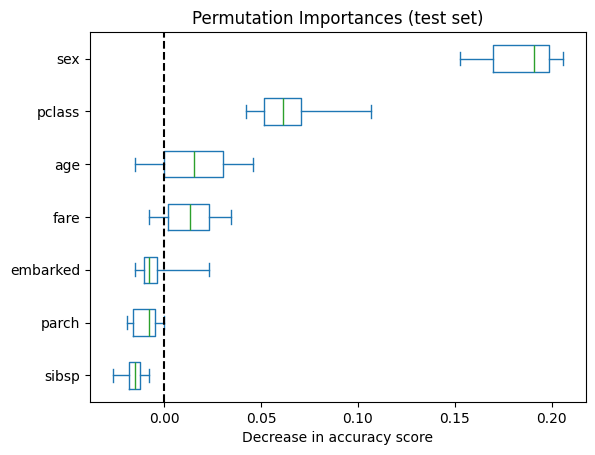

In [18]:
from sklearn.inspection import permutation_importance


# Calculate the permutation importance of each feature
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=5)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")

This shows that the low cardinality categorical feature, `sex_male` and `sex_female` and `pclass` are the most important feature. Indeed, permuting the values of these features will lead to **most decrease in accuracy score** of the model on the test set.

Retry computing permutation feature importance on the training set.

Text(0.5, 0, 'Decrease in accuracy score')

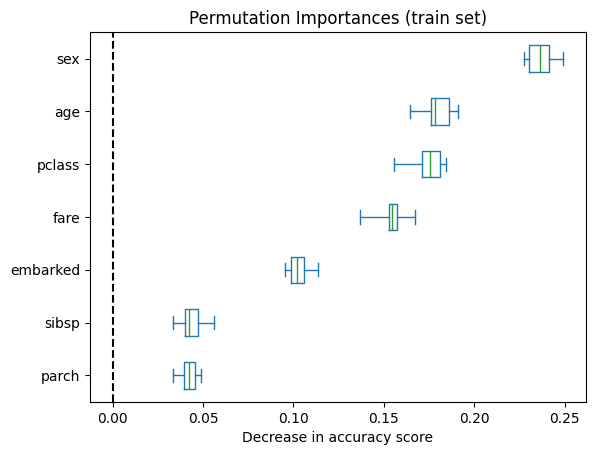

In [19]:

# Calculate the permutation importance of each feature
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=5)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")

This reveals that `fare` get a significantly higher importance ranking than when computed on the test set. The difference between those two plots is a confirmation that the RF model has enough capacity to use that features to overfit.

### Exercise 1.3

We can further retry the experiment by **limiting the capacity of the trees to overfit** by setting **min_samples_leaf at 20** data points.

In [20]:
# Create a random forest classifier
clf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42, min_samples_leaf=20)),
    ]
)
clf.fit(X_train, y_train)

# Train the classifier on the data
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num', MinMaxScaler(),
                                                  ['sibsp', 'parch', 'fare',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=20, random_state=42))])

New Model's accuracy score

In [21]:
print(f"RF train accuracy: {clf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {clf.score(X_test, y_test):.3f}")

RF train accuracy: 0.808
RF test accuracy: 0.847


Observing the accuracy score on the training and testing set, we observe that the two metrics are very similar now. Therefore, our model is not overfitting anymore. We can then check the permutation importances with this new model.

Text(0.5, 0, 'Decrease in accuracy score')

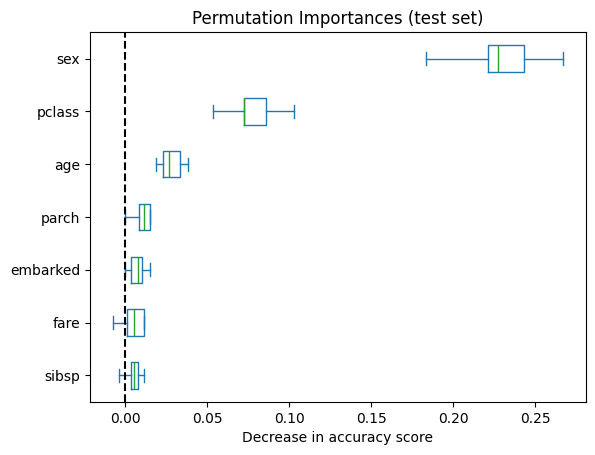

In [22]:

# Calculate the permutation importance of each feature
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=5)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
#ax.figure.tight_layout()

Text(0.5, 0, 'Decrease in accuracy score')

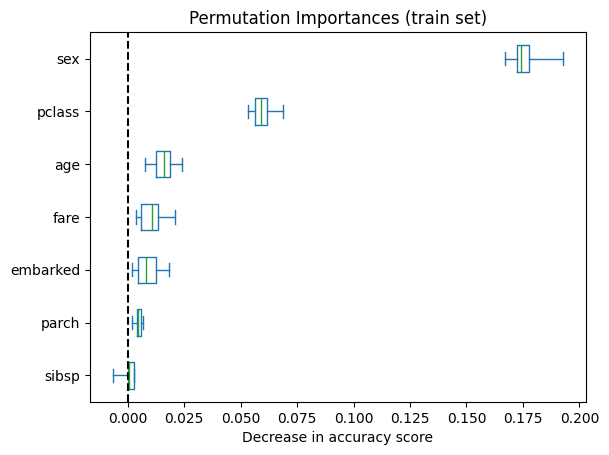

In [23]:

# Calculate the permutation importance of each feature
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=5)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
#ax.figure.tight_layout()

# **Partial dependence plot**


---



The **Partial Dependence Plot** (in short, PDP) shows the **marginal effect** of one or two features **on the predicted outcome** of a Machine learning model.

* It is a **global method**: The method considers **all instances** and gives a statement about the **global relationship** of a feature with the predicted outcome.

Key **Advantages**:

* The PDP computation is really **intuitive**.
* By providing an **explanation** in the form of a **visualization**, it is easy to inspect.


Main **Disadvantages**:

* The **assumption** of **independence** is the biggest issue with PDP plots.
* The **realistic maximum number of features** in a partial dependence function is **two**.



---

# **Exercise 2**

* Instanciate and Fit a [**DecisionTreeClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and a [**RandomForestClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) over Titanic dataset.
* **Evaluate** both models by inspecting their **accuracy** scores over train and test dataset.
* Print **Feature Importances** for both models.
* Generate the **PDP** using [**PartialDependenceDisplay.from_estimator**](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html) function for both models.


## **Solution:**

### Imports

In [24]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

RF Classifier

In [25]:
# Create a random forest classifier
rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
# Train the classifier on the data
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num', MinMaxScaler(),
                                                  ['sibsp', 'parch', 'fare',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

DT classifier

In [26]:
# Create a decision tree classifier
dt = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", DecisionTreeClassifier(random_state=42)),
    ]
)
# Train the classifier on the data
dt.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num', MinMaxScaler(),
                                                  ['sibsp', 'parch', 'fare',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

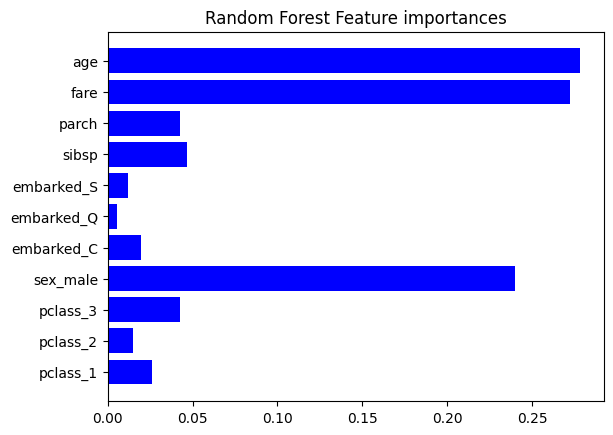

In [27]:
#Plot the feature importance for Random Forest

importance = rf[-1].feature_importances_

feature_names = rf[:-1].get_feature_names_out()

plt.barh(feature_names, importance, color='blue')
plt.title("Random Forest Feature importances")
plt.show()

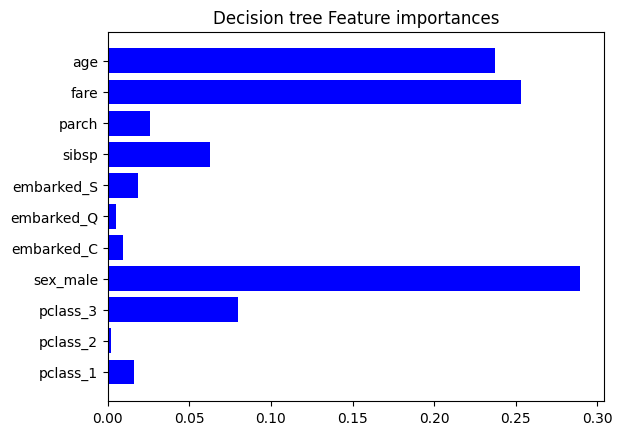

In [28]:
#Plot the feature importance for decision tree

importance = dt[-1].feature_importances_

feature_names = dt[:-1].get_feature_names_out()

plt.barh(feature_names, importance, color='blue')

plt.title("Decision tree Feature importances")
plt.show()

Generate PDP for Random Forest Classifier

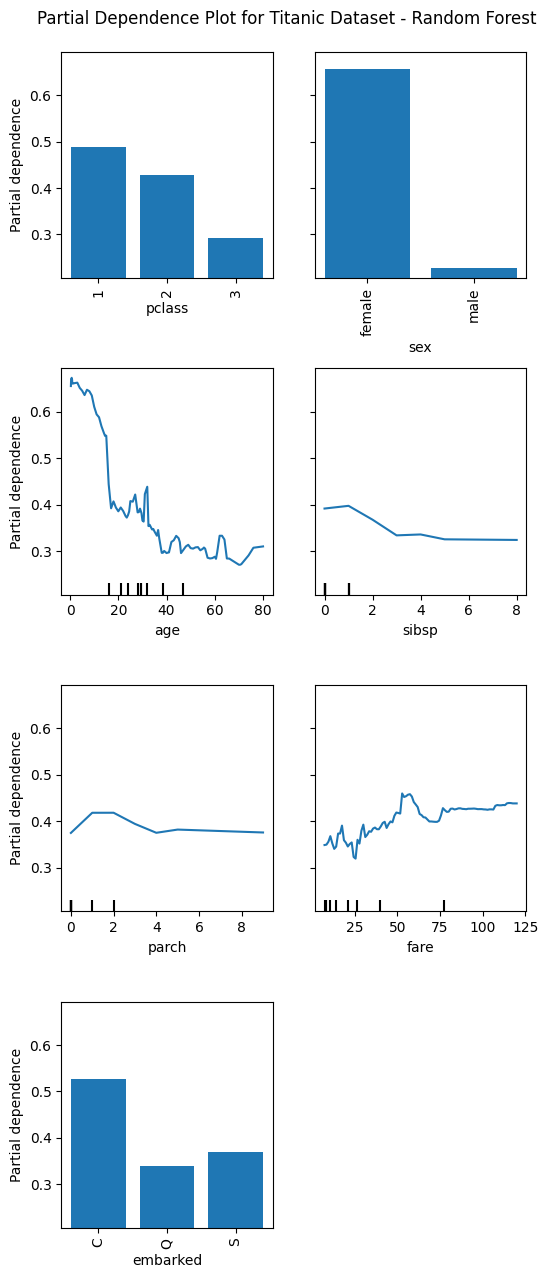

In [29]:
feature_names = X_train.columns

# Generate Partial Dependence Plot for RF

fig, ax = plt.subplots(figsize=(6, 14))

display = PartialDependenceDisplay.from_estimator(
    rf,
    X_train,
    features=feature_names,
    n_cols=2,
    categorical_features=categorical_columns,
    ax=ax

)

display.figure_.suptitle('Partial Dependence Plot for Titanic Dataset - Random Forest')
display.figure_.subplots_adjust(hspace=0.4, top=0.95)
plt.show()


Generate PDP for Decision Tree Classifier

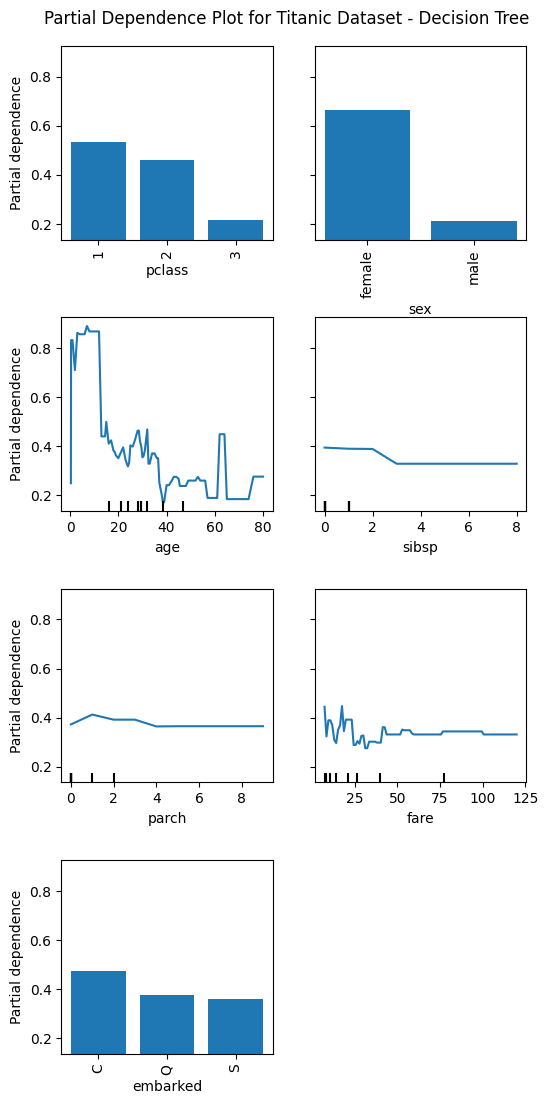

In [30]:
feature_names = X_train.columns

# Generate Partial Dependence Plot for DT
fig, ax = plt.subplots(figsize=(6, 12))

display = PartialDependenceDisplay.from_estimator(
    dt,
    X_train,
    features=feature_names,
    n_cols=2,
    categorical_features=categorical_columns,
    ax=ax

)

display.figure_.suptitle('Partial Dependence Plot for Titanic Dataset - Decision Tree')
display.figure_.subplots_adjust(hspace=0.4, top=0.95)
plt.show()


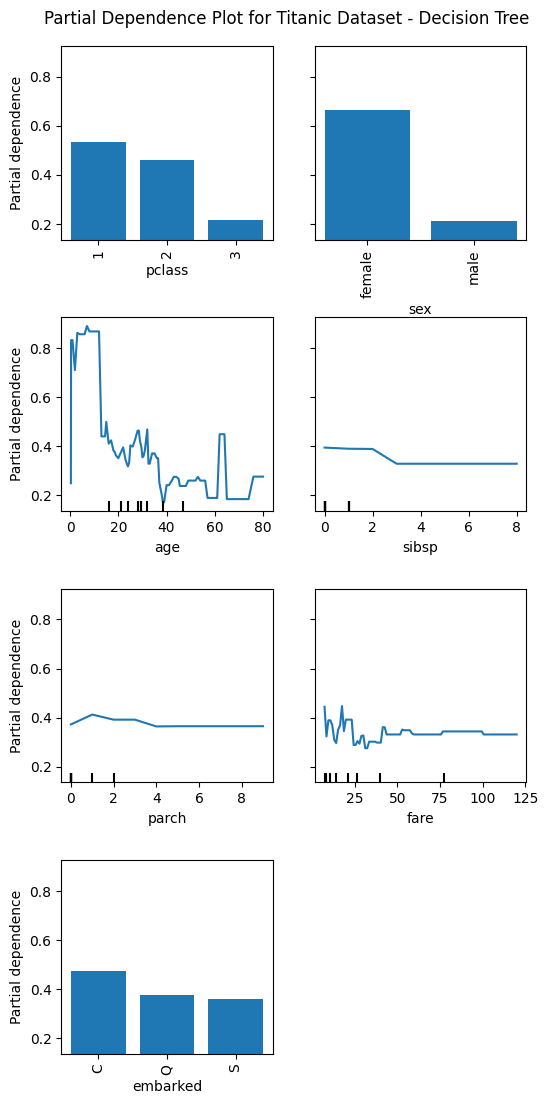

In [31]:
display.figure_

# **Global surrogate models**


---



The purpose of (interpretable) surrogate models is to **approximate** the **predictions** of the underlying model *as accurately as possible* and to be interpretable at the same time.

The surrogate model is a **model-agnostic method**, since it does **not require** any **information** about the **inner workings of the black box model**, *only access to data and the prediction function is necessary*.

To **obtain a surrogate model** you have to perform the following steps:



1.   Select a dataset X.
2.   For the selected dataset X, get the predictions of the black box model.
3.   Select an interpretable model type (linear model, decision tree, …).
4.   Train the interpretable model on the dataset X and its predictions.

Congratulations! You now have a surrogate model!

Measure **how well** the **surrogate model replicates the predictions of the black box model** to interpret the model.



---

## **Exercise 3:**

The aim of this exercise is to use a white-box model, that is the surrogate model, to explain the black-box model. You have to:

* Instanciate and fit the **black-box** model, i.e. the [**GradientBoosterClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) over the Titanic
dataset.
> * You can retrieve the predictions with the *_predictions* function.



* Instanciate and fit the **white-box** model, i.e. the [**LogisticRegression**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) over the Titanic dataset **and** the predictions of the black-box model.
* Calculate the **accuracy_score** for both models on the training and test dataset.
* Calculate the **reconstruction_error** for both models on the training and test dataset.
* **Print** the obtained **results**.

***Hint:***
> You can inted the **reconstruction_error** as the loss of information or performance when using the predictions of the black-box model to train the white-box model.

## **Solution:**

### Imports

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Train the black-cox model

In [33]:
# Train a black box model (GradientBoostingClassifier)
black_box_model = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", GradientBoostingClassifier(n_estimators=100,random_state=42)),
    ]
)
black_box_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num', MinMaxScaler(),
                                                  ['sibsp', 'parch', 'fare',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

Train the white-box model over the Titanic dataset and the predictions from the black-box model.

In [34]:
# Train a white box model (Logistic Regression) on the predictions of the black box model
white_box_model = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", LogisticRegression(max_iter=1000,random_state=42)),
    ]
)

black_box_train_predictions = black_box_model.predict(X_train)


white_box_model.fit(X_train, black_box_train_predictions)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num', MinMaxScaler(),
                                                  ['sibsp', 'parch', 'fare',
                                                   'age'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

Inspect the coefficients

In [35]:
# Extract coefficients (weights)
coefficients = white_box_model[1].coef_[0]

feature_names = white_box_model[:-1].get_feature_names_out()

# Calculate odds ratios and standard errors
odds_ratios = np.exp(coefficients)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients,
    'Odds Ratio': odds_ratios
})

# Print the DataFrame
print(results_df)

       Feature    Weight  Odds Ratio
0     pclass_1  1.405170    4.076221
1     pclass_2  0.530692    1.700108
2     pclass_3 -1.925615    0.145786
3     sex_male -4.247295    0.014303
4   embarked_C  0.518761    1.679945
5   embarked_Q  0.258913    1.295521
6   embarked_S -0.767426    0.464206
7        sibsp -1.025828    0.358499
8        parch  0.271571    1.312025
9         fare  0.208645    1.232008
10         age -3.382159    0.033974


Evaluate the performances of black-box and white-box models.

In [36]:
# Evaluate the black box model and white box model performance
black_box_train_accuracy = accuracy_score(y_train, black_box_train_predictions)
black_box_test_accuracy = accuracy_score(y_test, black_box_model.predict(X_test))
white_box_train_accuracy = accuracy_score(y_train, white_box_model.predict(X_train))
white_box_test_accuracy = accuracy_score(y_test, white_box_model.predict(X_test))

In [37]:
white_box_reconstruction_error_train = 1-accuracy_score(black_box_train_predictions, white_box_model.predict(X_train))
white_box_reconstruction_error_test = 1-accuracy_score(black_box_model.predict(X_test), white_box_model.predict(X_test))

print("\nWhite Box Model (Trained on Black Box Predictions):")
print(f"Train Reconstruction Error: {white_box_reconstruction_error_train:.2f}")
print(f"Test Reconstruction Error: {white_box_reconstruction_error_test:.2f}")


White Box Model (Trained on Black Box Predictions):
Train Reconstruction Error: 0.11
Test Reconstruction Error: 0.10
